In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
data=pd.read_csv("D:\ML\ML Assignment\Global_Pollution_Analysis.csv")
df=pd.DataFrame(data)
print(df.head)

<bound method NDFrame.head of           Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0         Hungary  2005               272.70                 124.27   
1       Singapore  2001                86.72                  60.34   
2         Romania  2016                91.59                  83.36   
3    Cook Islands  2018               280.61                  67.16   
4        Djibouti  2008               179.16                 127.53   
..            ...   ...                  ...                    ...   
195        Latvia  2004               115.84                  78.75   
196    Bangladesh  2002               121.82                 120.97   
197         Korea  2011               149.73                 146.92   
198       Vanuatu  2002               237.20                 113.63   
199       Croatia  2010               135.50                 158.43   

     Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                   51.95                    94802.83   
1  

In [6]:
# Check missing values per column
print("Missing values per column:\n", df.isnull().sum())

# Check total missing values in the entire dataset
print("Total missing values:", df.isnull().sum().sum())

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Missing values per column:
 Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Rec   overed (in GWh)              0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64
Total missing values: 0
Duplicate rows: 0


In [11]:
#normalize
print(df.columns)
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(numeric_cols)

rawnumber=df[['Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)']]


scaler=StandardScaler()
scalereddata=scaler.fit_transform(rawnumber)

without_scaled=df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]]
scalered=scaler.fit_transform(without_scaled)
df[numeric_cols]=scalereddata
print(scalered)
print(scalereddata)

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')
Numeric columns:
Index(['Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')
[[ 1.37616736e+00  1.93880092e-01 -6.19764106e-01]
 [-1.40357769e+00 -1.15309763e+00  1.02874419e+00]
 [-1.33078837e+00 -6.68076086e-01  1.14239958e+00]
 [ 1.49439396e+00 -1.00940315e+00  4.3167

In [12]:
# encoded 

print(df.select_dtypes(include=['object']).columns)

print(df.columns)
df_encoded=pd.get_dummies(
    df,
    columns=["Country"],
    dtype=int
)


Index(['Country'], dtype='object')
Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


In [11]:
#feature creating
df_encoded["Total_Energy_Consumption_GWh"] = df["Energy_Consumption_Per_Capita (in MWh)"] * df["Population (in millions)"] * 1000
df_encoded["CO2_per_Capita_MT"] = df["CO2_Emissions (in MT)"] / (df["Population (in millions)"] * 1e6)
df_encoded["Industrial_Waste_per_Capita_kg"] = df["Industrial_Waste (in tons)"] * 1000 / (df["Population (in millions)"] * 1e6)
df_encoded["Plastic_Waste_Ratio"] = df["Plastic_Waste_Produced (in tons)"] / df["Industrial_Waste (in tons)"]
df_encoded["Renewable_to_Recovered_Ratio"] = df["Renewable_Energy (%)"] / df["Energy_Rec   overed (in GWh)"]
df_encoded["GDP_per_Energy_Unit"] = df["GDP_Per_Capita (in USD)"] / df["Energy_Consumption_Per_Capita (in MWh)"]


In [ ]:
#k-means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scalered)


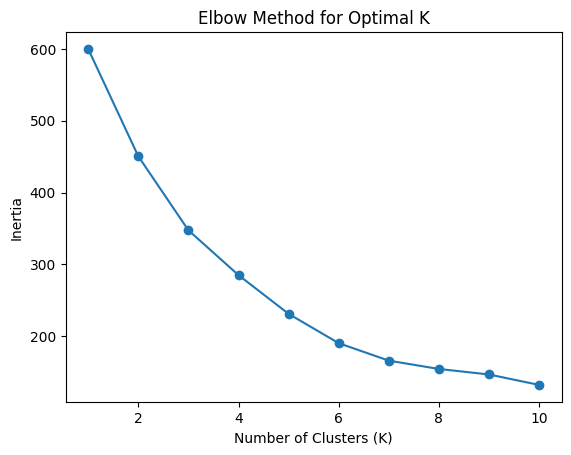

In [21]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scalered)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


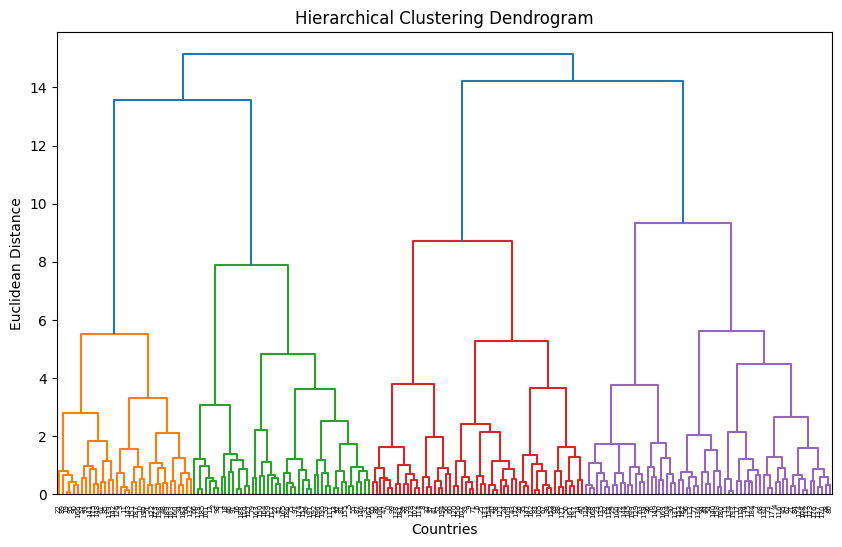

        Country  Cluster
0       Hungary        2
1     Singapore        0
2       Romania        0
3  Cook Islands        0
4      Djibouti        1


In [23]:
linkage_matrix = linkage(scalered, method='ward')

# Dendrogram to visualize hierarchical structure
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.show()

# Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["Cluster"] = agg.fit_predict(scalered)

print(df[["Country", "Cluster"]].head())

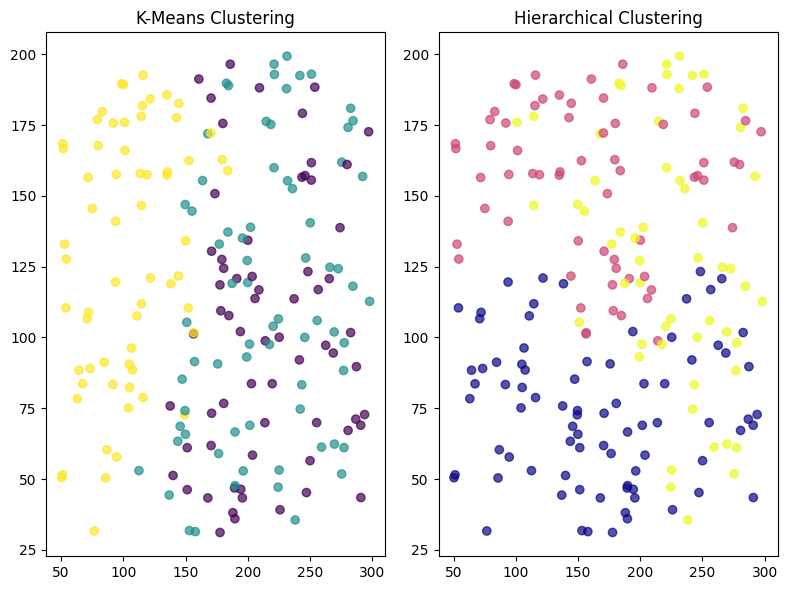

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(scalered)

# --- Hierarchical Clustering ---
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["Hierarchical_Cluster"] = agg.fit_predict(scalered)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.scatter(df["Air_Pollution_Index"], df["Water_Pollution_Index"], 
            c=df["KMeans_Cluster"], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering")

plt.subplot(1,2,2)
plt.scatter(df["Air_Pollution_Index"], df["Water_Pollution_Index"], 
            c=df["Hierarchical_Cluster"], cmap='plasma', alpha=0.7)
plt.title("Hierarchical Clustering")

plt.tight_layout()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Select Features and Target ---
X = df[["Air_Pollution_Index", "CO2_Emissions (in MT)", "Industrial_Waste (in tons)",
         "Water_Pollution_Index", "Soil_Pollution_Index"]]
y = df["Energy_Rec   overed (in GWh)"]

# --- Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Build Feedforward Neural Network ---
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# --- Compile Model ---
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train Model ---
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

# --- Evaluate on Test Data ---
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.2f} GWh")


Epoch 1/100


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9686 - mae: 0.8456 - val_loss: 1.0602 - val_mae: 0.9001
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9195 - mae: 0.8203 - val_loss: 1.0997 - val_mae: 0.9167
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8864 - mae: 0.8032 - val_loss: 1.1226 - val_mae: 0.9238
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8686 - mae: 0.7963 - val_loss: 1.1506 - val_mae: 0.9339
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8541 - mae: 0.7892 - val_loss: 1.1456 - val_mae: 0.9294
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8366 - mae: 0.7814 - val_loss: 1.1627 - val_mae: 0.9336
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8200 - mae: 0.7721 - val_loss: 1.1878 - val_mae: 0.9432
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8088 - mae: 0.7686 - val_loss: 1.1756 - val_mae: 0.9350
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7936 - mae: 0.

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# --- Make predictions ---
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # ensure correct shape

# --- Calculate Evaluation Metrics ---
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Model Evaluation Metrics:
Mean Squared Error (MSE): 1.845
Mean Absolute Error (MAE): 1.104
R² Score: -0.644


In [16]:
from sklearn.linear_model import LinearRegression

# Linear Regression baseline
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Baseline:")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")


Linear Regression Baseline:
R²: -0.0147
MSE: 1.1391
MAE: 0.9630


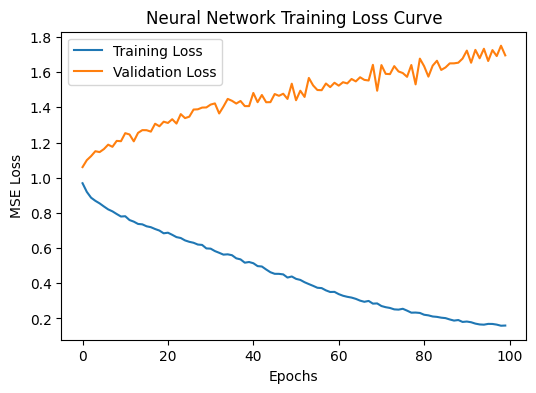

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


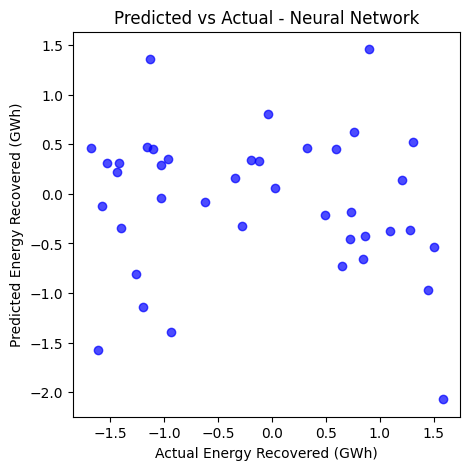

In [17]:
y_pred_nn = model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_nn, alpha=0.7, color='blue')
plt.xlabel("Actual Energy Recovered (GWh)")
plt.ylabel("Predicted Energy Recovered (GWh)")
plt.title("Predicted vs Actual - Neural Network")
plt.show()


Final Summary:
The analysis compared K-Means, Hierarchical Clustering, and a Neural Network model to examine relationships between pollution indices and energy recovery across countries. K-Means efficiently grouped nations with similar pollution-energy profiles but was limited by sensitivity to outliers and the number of clusters chosen, while Hierarchical Clustering revealed structural relationships but was less scalable. The Feedforward Neural Network achieved an MSE of **1.845**, MAE of **1.104**, and R² of **-0.644**, performing worse than the Linear Regression baseline (MSE = 1.139, MAE = 0.963, R² = -0.0147), indicating weak predictive ability. Overall, clustering methods were more effective for pattern discovery, whereas regression-based models showed potential for prediction with further tuning and data refinement.
